In [ ]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

class KMeans:
    def __init__(self, k, tolerance = 0.001, n_iter = 200):
        self.k = k
        self.n_iter = n_iter
        self.tol = tolerance

    def euclidean_dist(self, pt1, pt2):
        return np.linalg.norm(pt1 - pt2, axis=0)

    def match_points_to_clusters(self, X):
        for p in X:
            distances = []
            for idx, centroid in self.centroids.items():
                distances.append(self.euclidean_dist(p, centroid))

            c_idx = distances.index(min(distances))
            self.clusters[c_idx].append(p)

    def update_centroids(self):
        for c_idx, pts in self.clusters.items():
            self.centroids[c_idx] = np.average(pts, axis = 0)

    def fit(self, X):
        flag_converged = True
        self.centroids = {}

        for idx, i in enumerate(random.sample(range(len(X)), self.k)):
            self.centroids[idx] = X[i]

        for i in range(self.n_iter):
            self.clusters = defaultdict(list)

            self.match_points_to_clusters(X)

            old_centroid = self.centroids.copy()
            self.update_centroids()

            for centroid in self.centroids:
                delta_change = np.sum((self.centroids[centroid] - old_centroid[centroid])/old_centroid[centroid])

                if (delta_change * 100.0) > self.tol:
                    flag_converged = False
                    break
            if flag_converged:
                break

    def predict(self, X):
        distances = []

        for idx, centroid in self.centroids.items():
          dist = np.linalg.norm(X-centroid)
          distances.append(dist)

        return distances[min(distances)]


"""
Time complexity: O(nk x i) ~ O(nk)
Space complexity: O(n)

n = num of data points
k = num of clusters
i = num of iterations
"""

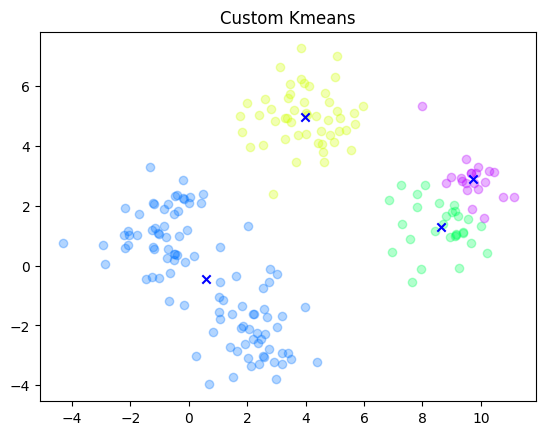

In [ ]:
K=4

cluster1 = np.array([-1, 1]) + np.random.randn(50, 2)
cluster2 = np.array([4, 5]) + np.random.randn(50, 2)
cluster3 = np.array([9, 2]) + np.random.randn(50, 2)
cluster4 = np.array([2, -2]) + np.random.randn(50, 2)
X = np.concatenate((cluster1, cluster2, cluster3, cluster4), axis = 0)

k_means = KMeans(K)
k_means.fit(X)

colors = sns.color_palette("hsv", K)

plt.figure()
for i, pts in k_means.clusters.items():
    for p in pts:
        plt.scatter(p[0], p[1], color = colors[i], alpha=0.3)

for _, centroid in k_means.centroids.items():
    plt.scatter(centroid[0], centroid[1], marker = "x", c="b")
plt.title("Custom Kmeans")
plt.show()